In [1]:
# Import the pandas library
import pandas as pd
# Read the CSV file into a data frame
df = pd.read_csv(r'/content/sample_data/fashion dataset.csv',engine='python')


In [2]:
# Print the first 5 rows of the first data frame
print(df.head())

         p_id                                               name   price  \
0   1518329.0   Dupatta Bazaar White Embroidered Chiffon Dupatta   899.0   
1   5829334.0  Roadster Women Mustard Yellow Solid Hooded Swe...  1199.0   
2  10340119.0  Inddus Peach-Coloured & Beige Unstitched Dress...  5799.0   
3  10856380.0            SASSAFRAS Women Black Parallel Trousers  1499.0   
4  12384822.0  Kotty Women Black Wide Leg High-Rise Clean Loo...  1999.0   

    colour           brand  ratingCount  avg_rating  \
0    White  Dupatta Bazaar       1321.0    4.548827   
1  Mustard        Roadster       5462.0    4.313255   
2    Peach          Inddus        145.0    4.068966   
3    Black       SASSAFRAS       9124.0    4.147523   
4    Black           Kotty      12260.0    4.078467   

                                         description  \
0  White embroidered&nbsp;dupattaChiffon<br>Hand-...   
1  Mustard yellow solid sweatshirt, has a hood, t...   
2  Peach-Coloured and beige woven design uns

In [6]:
num_rows, num_cols = df.shape
summary=df.describe
info = df.info()
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')
#print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14311 non-null  float64
 1   name          14310 non-null  object 
 2   price         14310 non-null  float64
 3   colour        14307 non-null  object 
 4   brand         14305 non-null  object 
 5   ratingCount   6581 non-null   float64
 6   avg_rating    6581 non-null   float64
 7   description   14310 non-null  object 
 8   p_attributes  14310 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1007.6+ KB
The DataFrame has 14329 rows and 9 columns.
None


In [8]:
## Read the excel file into a second data frame
df1 = pd.read_excel(r'/content/sample_data/fashion brand details.xlsx')


In [9]:
# Print the first 5 rows of the second data frame
print(df1.head())

   brand_id   brand_name
0         1          513
1         2         109F
2         3    20Dresses
3         4  250 Designs
4         5         3Pin


In [10]:
num_rows1, num_cols1 = df1.shape
summary1=df1.describe
info1 = df1.info()
print(f'The second DataFrame has {num_rows1} rows and {num_cols1} columns.')
#print(summary1)
print(info1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand_id    1020 non-null   int64 
 1   brand_name  1020 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.1+ KB
The second DataFrame has 1020 rows and 2 columns.
None


In [11]:
#Remove rows which are completely empty
df.dropna(how='all', inplace=True)

In [12]:
num_rows, num_cols = df.shape
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')

The DataFrame has 14311 rows and 9 columns.


In [13]:
num_unique_values = df['brand'].nunique()
print('The number of unique brands in first data frame ', num_unique_values)

The number of unique brands in first data frame  1020


In [14]:
# with the above analysis, it is clear that there are 1020 brands in first data frame as well as second data frame.
# We will merge both the data frames for further cleaning.
# convert values in brand column into lower case in both data frames for making merge possible.
df['brand'] = df['brand'].astype(str)
df['brand'] = df['brand'].str.lower()
df1['brand_name'] = df1['brand_name'].astype(str)
df1['brand_name'] = df1['brand_name'].str.lower()


In [15]:
# Rename the 'brand_name' column to 'brand' in second data frame (df1)
df1 = df1.rename(columns={'brand_name': 'brand'})

In [16]:
# Merge the two data frames on a common column brand
newdf = pd.merge(df, df1, on='brand',how='outer')

In [17]:
num_rows_newdf, num_cols_newdf = newdf.shape
summary_newdf=newdf.describe
info_newdf = newdf.info()
print(f'The New DataFrame has {num_rows_newdf} rows and {num_cols_newdf} columns.')
#print(summary_newdf)
print(info_newdf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 0 to 14310
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14311 non-null  float64
 1   name          14310 non-null  object 
 2   price         14310 non-null  float64
 3   colour        14307 non-null  object 
 4   brand         14311 non-null  object 
 5   ratingCount   6581 non-null   float64
 6   avg_rating    6581 non-null   float64
 7   description   14310 non-null  object 
 8   p_attributes  14310 non-null  object 
 9   brand_id      14305 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.2+ MB
The New DataFrame has 14311 rows and 10 columns.
None


In [18]:
# In order to find duplicate values, we use duplicated() function on df. When we apply value counts on the series , we get count of duplicate values
newdf.duplicated(keep=False).value_counts()

False    14227
True        84
dtype: int64

In [19]:
newdf.drop_duplicates(inplace=True)

In [20]:
# Check the number of empty cells or null values in each column
null_counts = newdf.isnull().sum()

# Print the null counts for each column
print(null_counts)

p_id               0
name               1
price              1
colour             4
brand              0
ratingCount     7706
avg_rating      7706
description        1
p_attributes       1
brand_id           6
dtype: int64


In [21]:
# Fill the missing values in the 'ratingCount' column and avg_rating column with 0
newdf['ratingCount'] = newdf['ratingCount'].fillna(0)
newdf['avg_rating'] = newdf['avg_rating'].fillna(0)


In [22]:
# Check the number of empty cells or null values in each column after filling missing values
null_counts1 = newdf.isnull().sum()

# Print the null counts for each column
print(null_counts1)

p_id            0
name            1
price           1
colour          4
brand           0
ratingCount     0
avg_rating      0
description     1
p_attributes    1
brand_id        6
dtype: int64


In [23]:
# Create a boolean mask indicating which rows have a missing value in the 'name' column
mask = df['name'].isnull()

# Select the rows with a missing value in the 'column_name' column
missing_rows = df.loc[mask, :]
print(missing_rows)

             p_id name  price colour brand  ratingCount  avg_rating  \
12162  19068208.0  NaN    NaN    NaN   nan          NaN         NaN   

      description p_attributes  
12162         NaN          NaN  


In [24]:
# Since row with p_id = 19068208.0 does not have any other data, Delete that specific row
newdf = newdf.dropna(subset=['name'])

In [25]:
# Check the number of empty cells or null values in each column after filling missing values
null_counts1 = newdf.isnull().sum()

# Print the null counts for each column
print(null_counts1)
num_rows_newdf, num_cols_newdf = newdf.shape

print(f'The New DataFrame has {num_rows_newdf} rows and {num_cols_newdf} columns.')


p_id            0
name            0
price           0
colour          3
brand           0
ratingCount     0
avg_rating      0
description     0
p_attributes    0
brand_id        5
dtype: int64
The New DataFrame has 14268 rows and 10 columns.


In [26]:
# checking for outliers in numerical data.
pd.set_option('display.float_format', '{:,.2f}'.format)
summary_newdf = newdf.describe()
print(summary_newdf)

               p_id     price  ratingCount  avg_rating  brand_id
count     14,268.00 14,268.00    14,268.00   14,268.00 14,263.00
mean  15,688,237.99  2,967.66        84.94        1.89    531.67
std    3,155,081.11  2,566.68       539.28        2.07    292.42
min       70,166.00    169.00         0.00        0.00      1.00
25%   14,136,143.00  1,599.00         0.00        0.00    278.00
50%   16,380,973.00  2,200.00         0.00        0.00    551.00
75%   18,075,667.00  3,497.25        19.00        4.14    783.00
max   19,415,760.00 47,999.00    21,274.00        5.00  1,020.00


In [ ]:
#Checking outliers in object data type columns. Count the number of occurrences of each unique value in the column

# Count the number of occurrences of each unique value in the column
namecounts = newdf['name'].value_counts()
colourcounts = newdf['colour'].value_counts()
brandcounts = newdf['brand'].value_counts()

# Print the counts
print(namecounts)
print(colourcounts)
print(brandcounts.head(),brandcounts.tail())


SCORPIOUS Women Pack of Shrug & Top                                                   10
Tokyo Talkies Women Blue Solid Denim Jacket                                            8
High Star Women Blue Slim Fit High-Rise Clean Look Stretchable Jeans                   6
Roadster Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Cropped Jeans           5
Levis Women Blue Skinny Fit Light Fade Stretchable Jeans                               5
                                                                                      ..
HERE&NOW Charcoal Grey & Navy Blue Mandarin Collar Roll-Up Sleeves Pure Cotton Top     1
HERE&NOW Off White & Maroon Pure Cotton Roll-Up Sleeves Regular Top                    1
HERE&NOW Black & Red Geometric Mandarin Collar Shirt Style Pure Cotton Top             1
HERE&NOW Women Mustard Yellow & White Striped Top                                      1
tantkatha Black Front Closure Saree Blouse With Embellished Neck                       1
Name: name, Length: 1

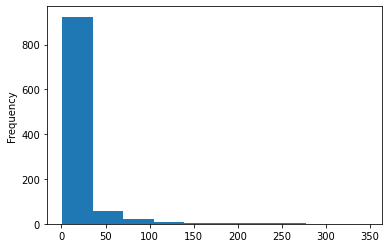

In [ ]:
#Import matplotlib for plots

import matplotlib.pyplot as plt

# Plot a histogram of the value counts
brandcounts.plot.hist()
# Show the plot
plt.show()

In [ ]:

# Find rows with the value 'na' in the name column
rows = newdf[newdf['name'].str.contains('^na$')]

# Print the rows
print(rows)

             p_id name    price colour brand  ratingCount  avg_rating  \
4404 7,779,911.00   na 1,499.00  Black     w         8.00        3.12   

                                            description  \
4404  Black and Blue solid Tunic, has a round neck, ...   

                                           p_attributes  brand_id  
4404  {'Body or Garment Size': 'To-Fit Denotes Body ...    968.00  


In [ ]:
# Extract the first seven columns of the DataFrame as a CSV file
#newdf.to_excel('test.xlsx', index=False)

# Extract the first column and the last three columns of the DataFrame
#sub_df = newdf[['p_id'] + newdf.columns[-3:].tolist()]

# Convert the DataFrame to a JSON file
newdf.to_json('outputfull.json', orient='records')